In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

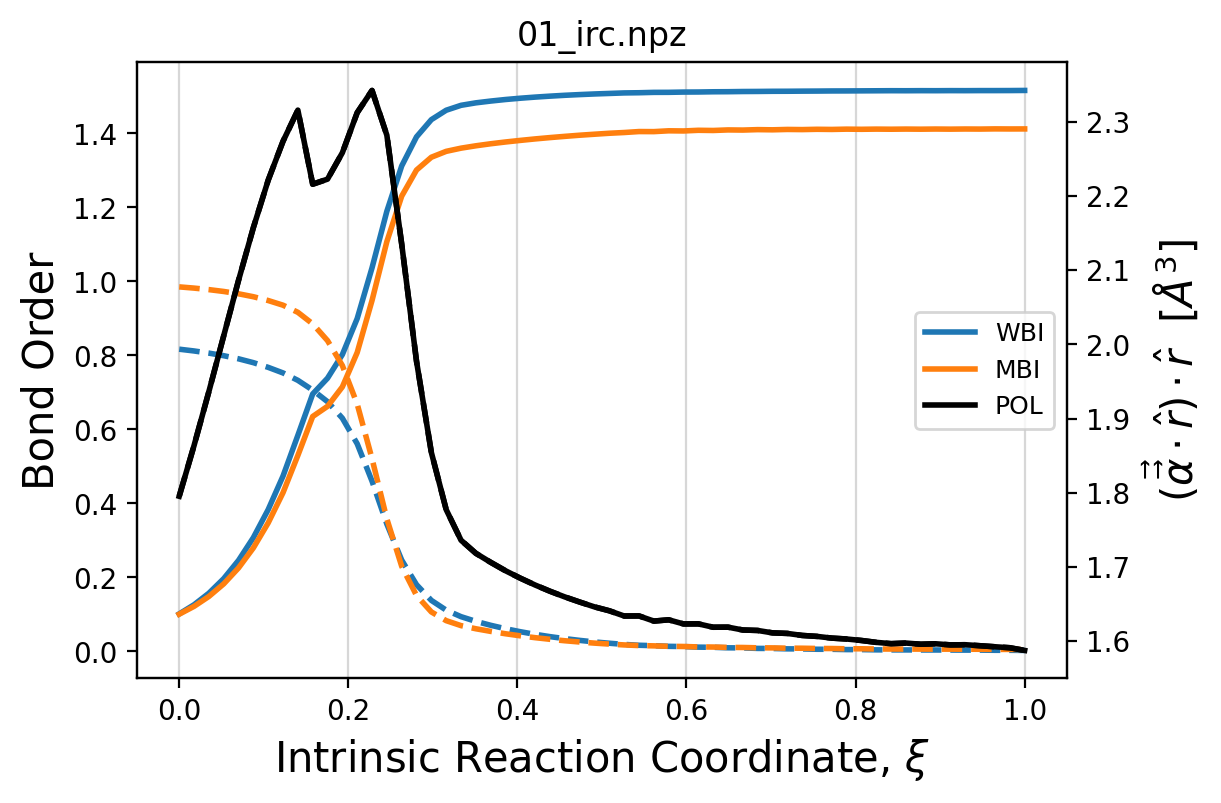

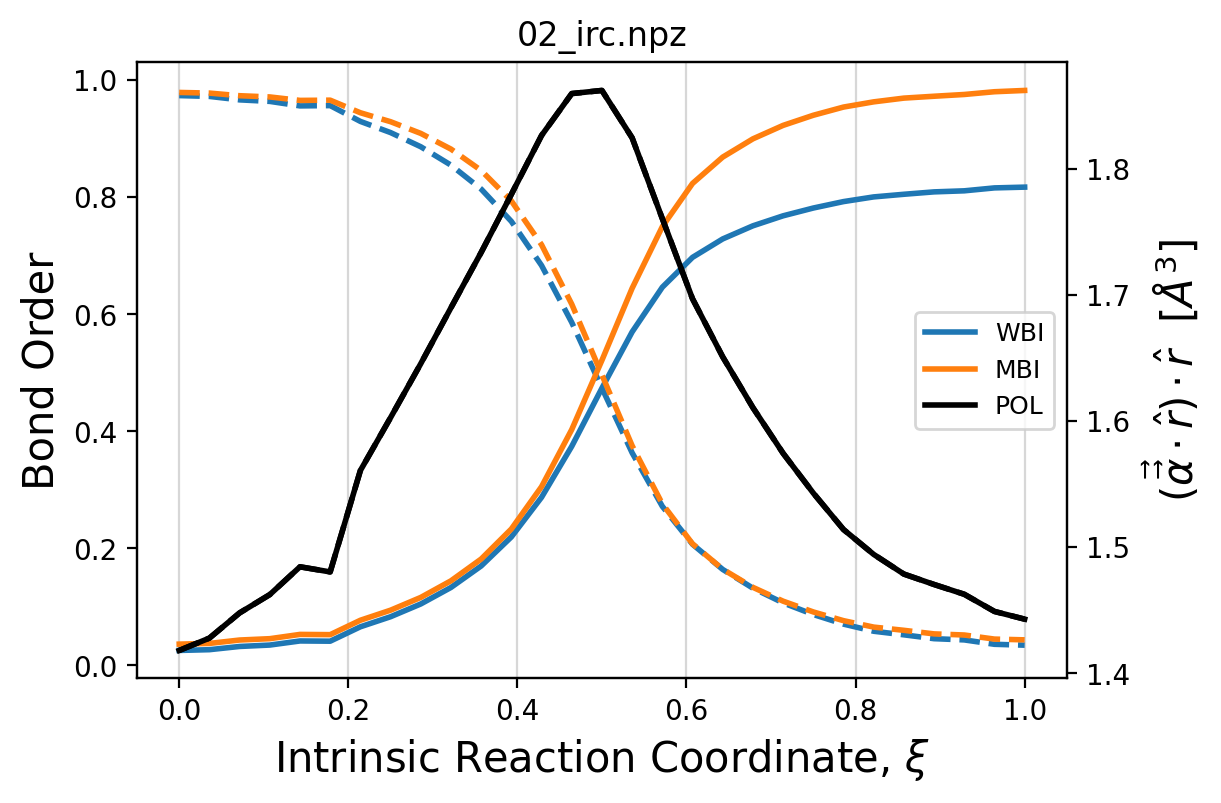

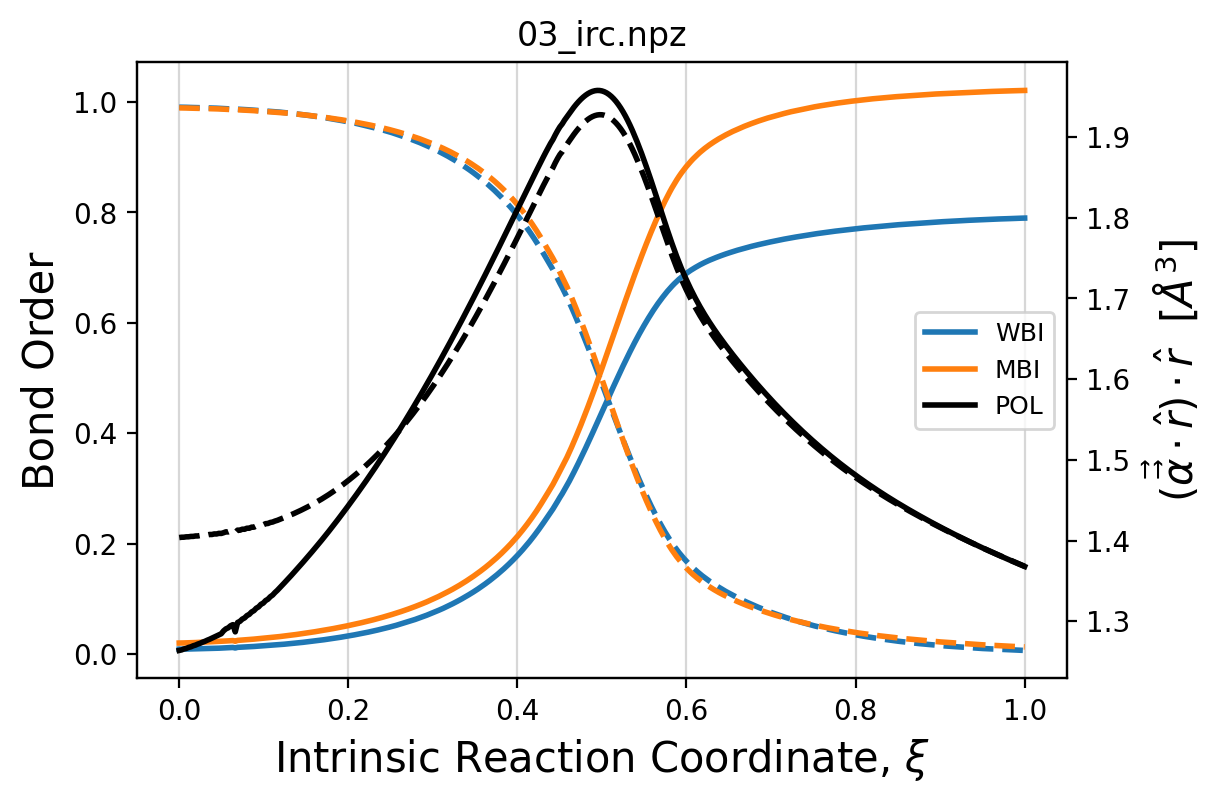

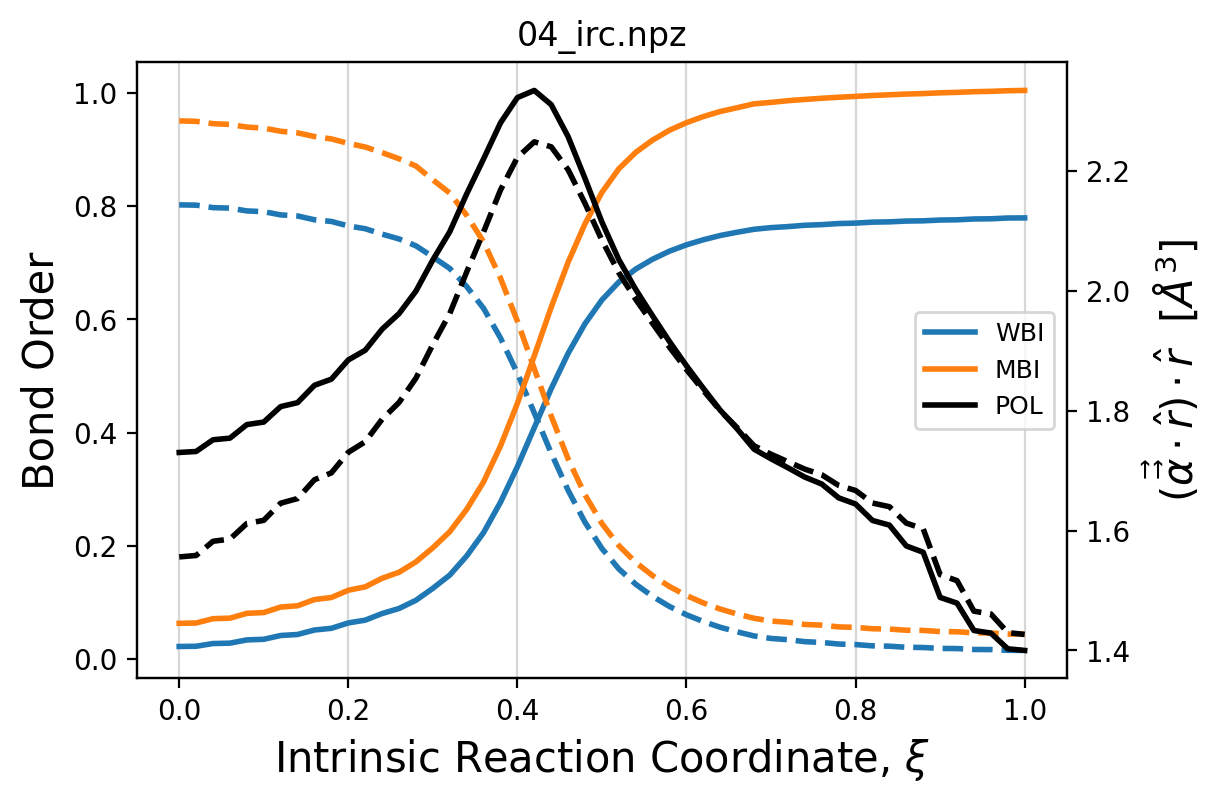

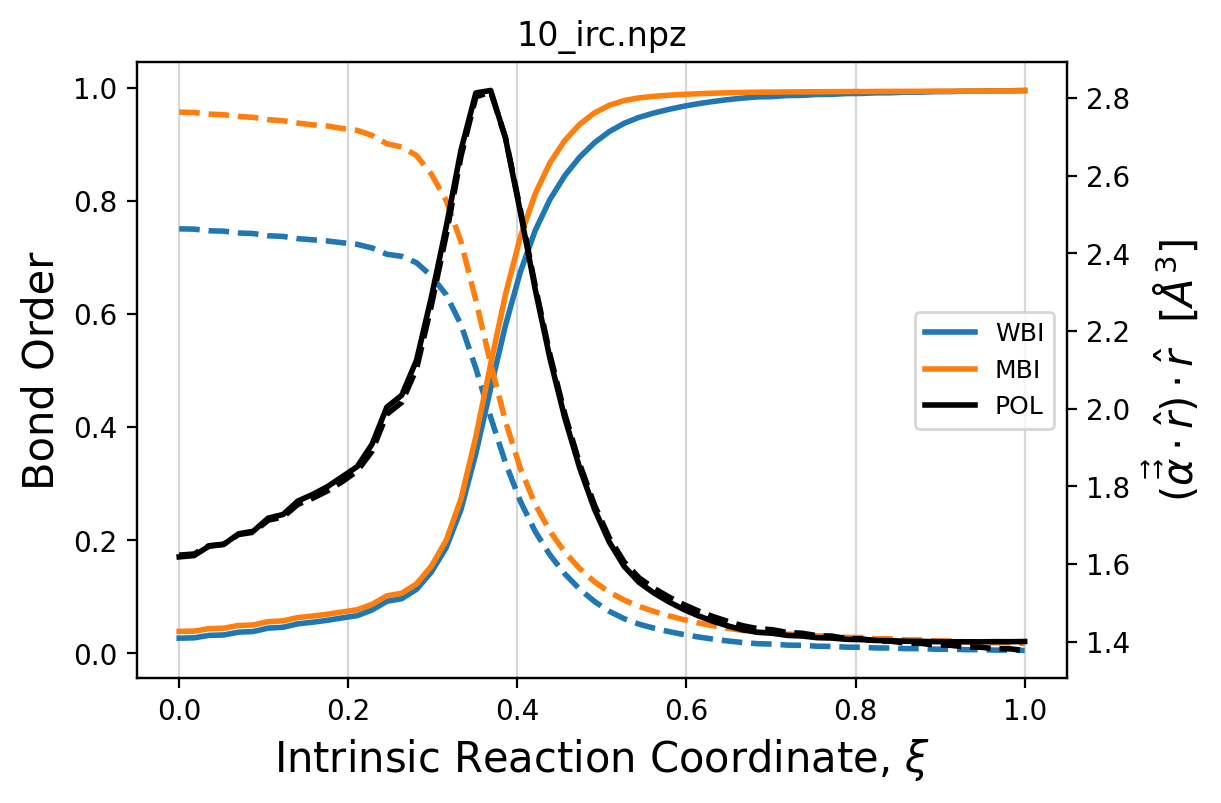

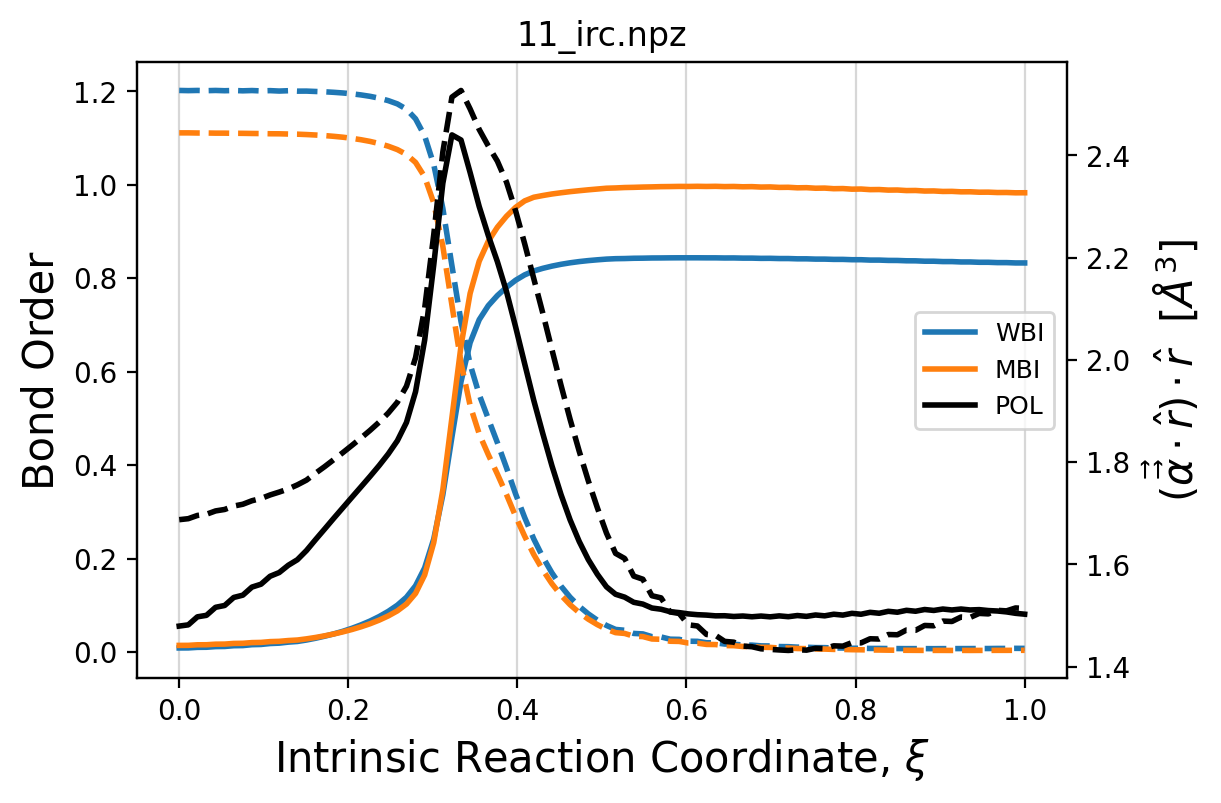

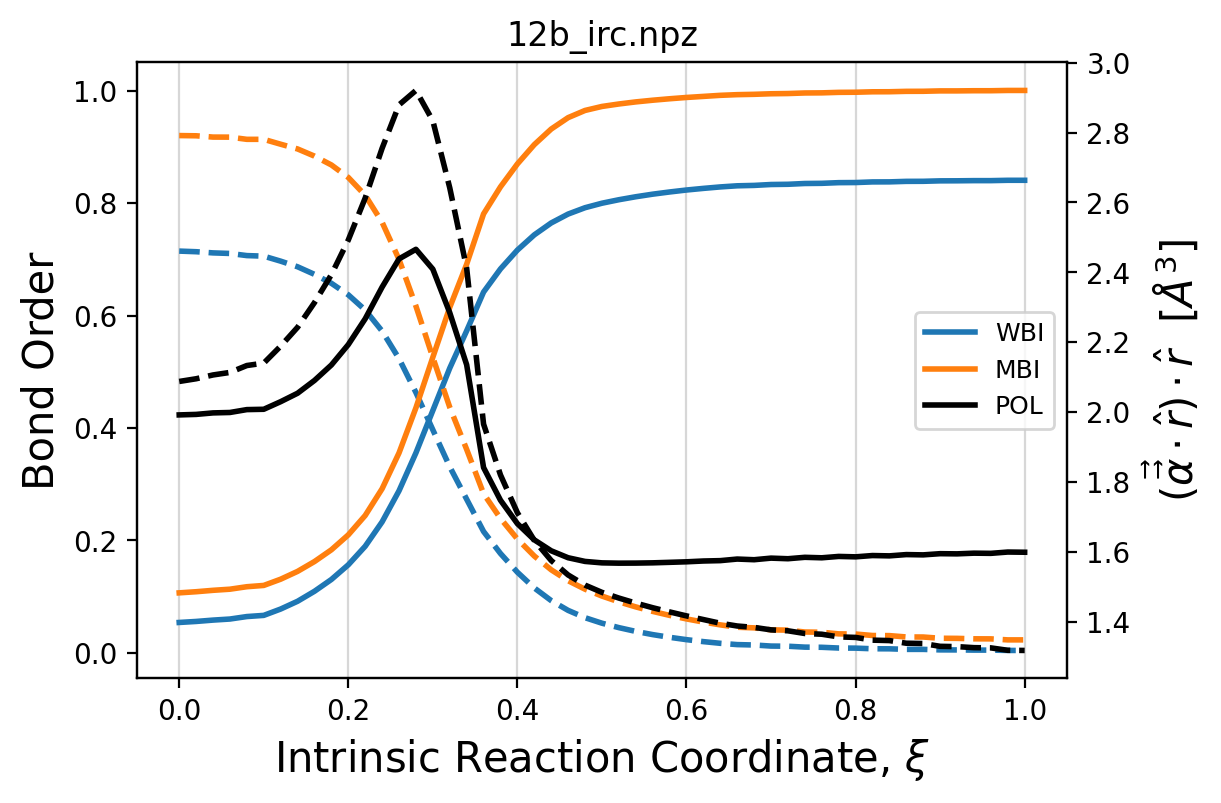

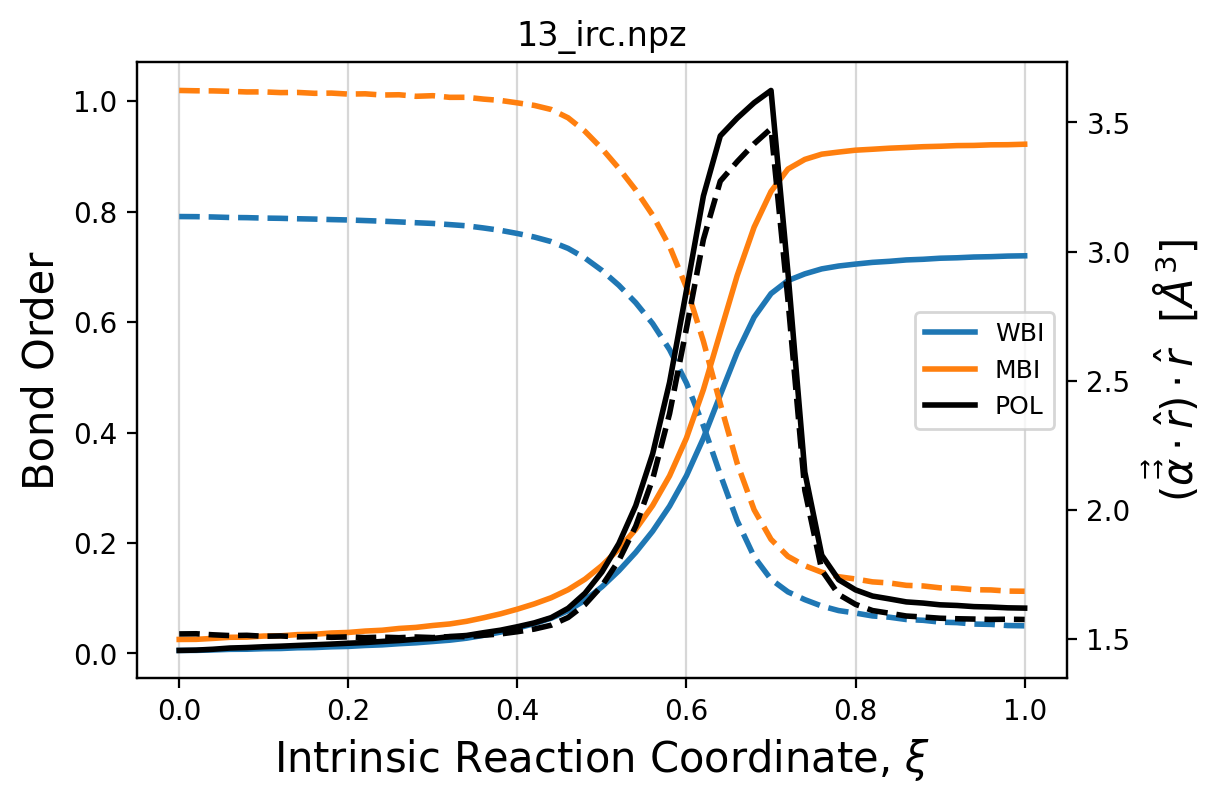

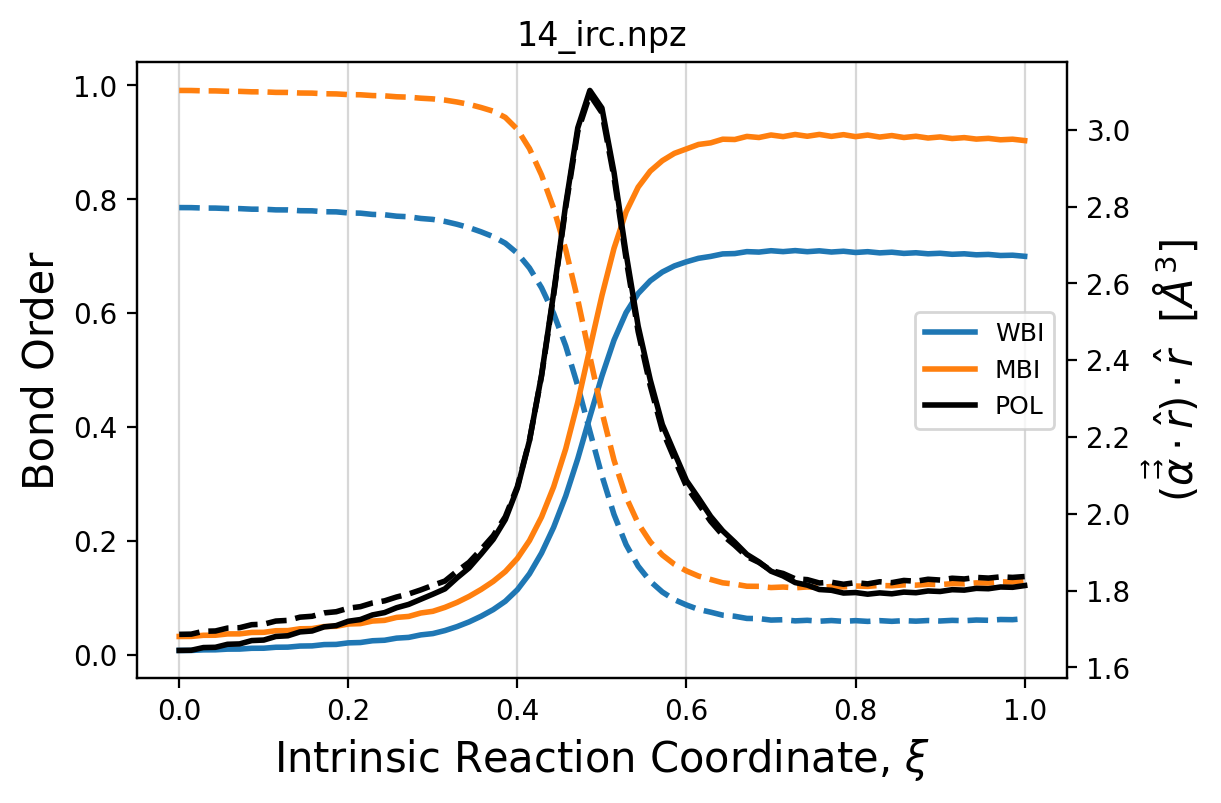

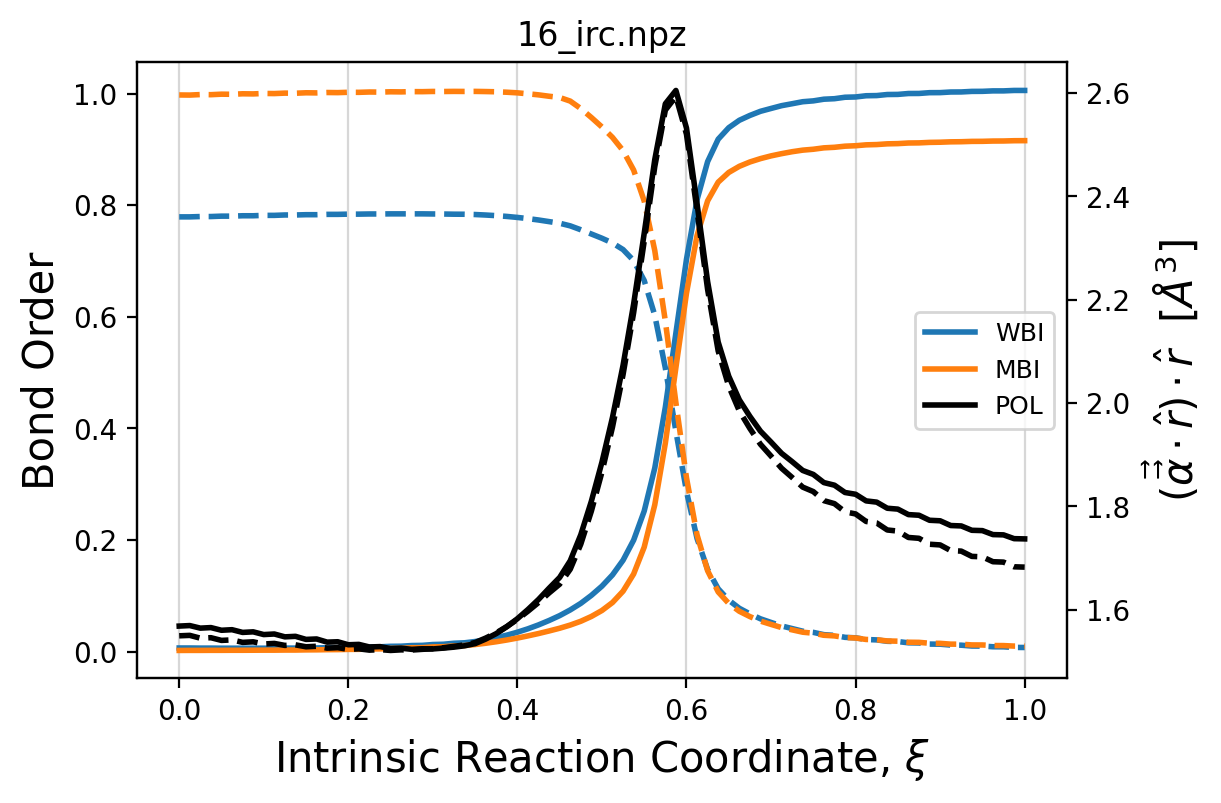

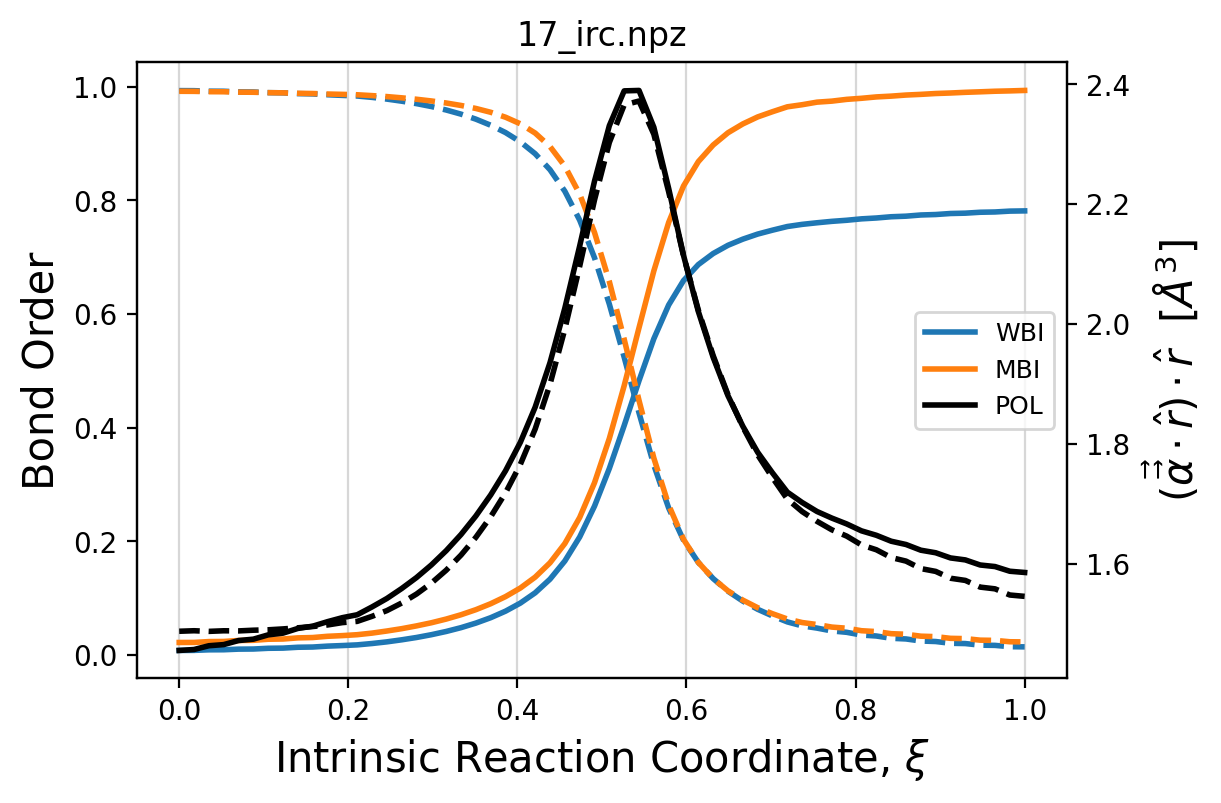

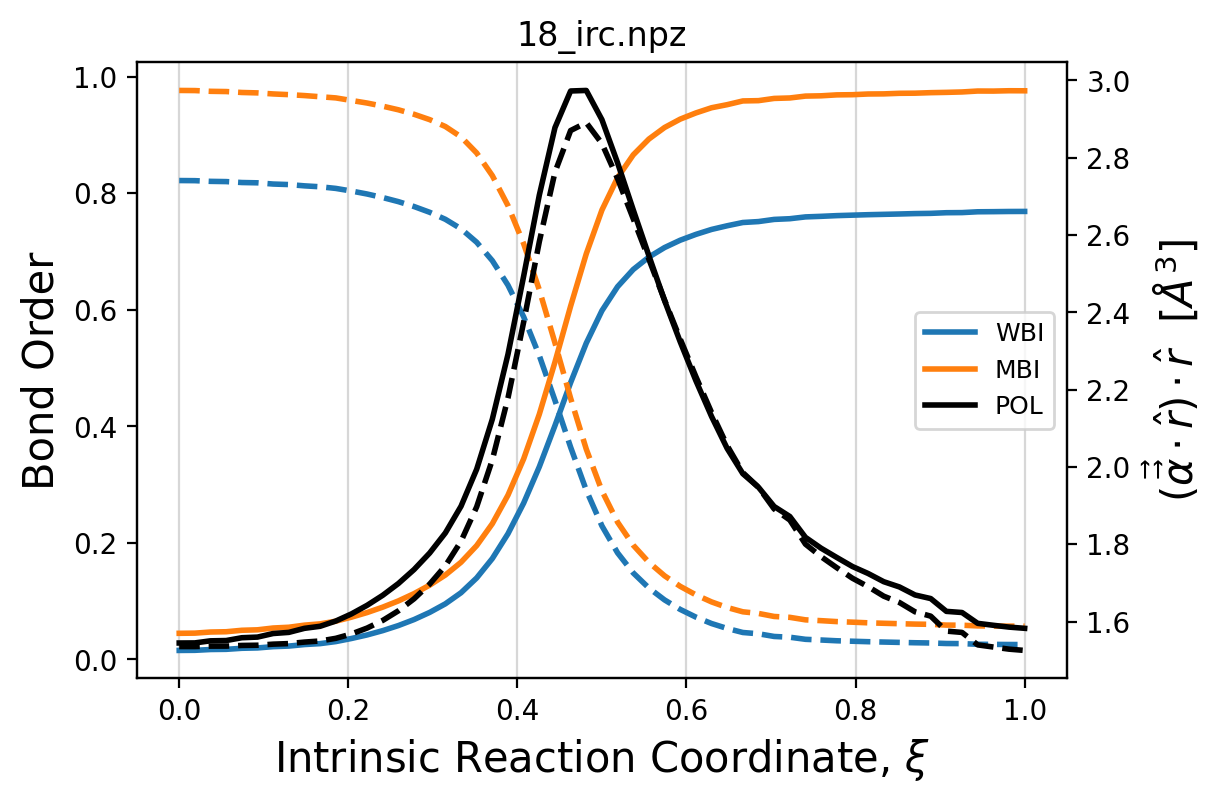

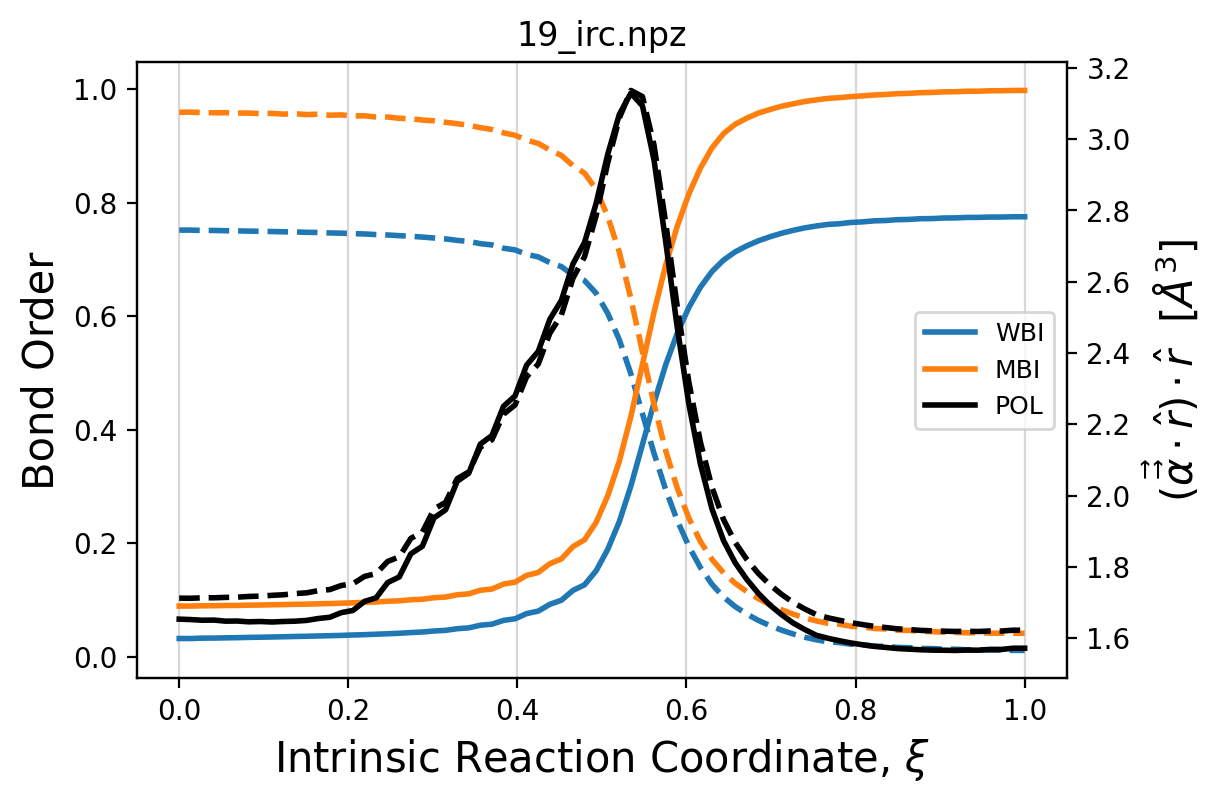

In [7]:
files = sorted([x for x in os.listdir("./H2COMBUSTION-BO-POL-IRC/") if ".npz" in x])

for file in files:
    if "12a" in file:
        continue
    for s in [5, 6, 7, 8, 9, 15]:
        if f'{s:02}' in file:
            break
    else:
        data = dict(np.load(f"./H2COMBUSTION-BO-POL-IRC/{file}"))
        R = data["R"]
        V = R[::, None, ::, ::] - R[::, ::, None, ::]
        D = np.sqrt(np.sum(np.square(V), -1))

        a = data["ALPHA"]
        aiso = (a[::, 0, 0] + a[::, 1, 1] + a[::, 2, 2])/3.0
        WBI = data["WBI"]
        MBI = data["MBI"]

        bb = np.round(WBI[0] - WBI[-1])
        i, j = np.where(bb == -1)
        i, j = i[i < j][0], j[i < j][0]
        k, l = np.where(bb ==  1)
        k, l = k[k < l][0], l[k < l][0]

        dr1 = V[::, i, j] / D[::, i, j].reshape((D.shape[0], 1))
        dr2 = V[::, k, l] / D[::, k, l].reshape((D.shape[0], 1))
        ar1 = (a @ dr1[::, ::, None]).squeeze(-1)
        ar2 = (a @ dr2[::, ::, None]).squeeze(-1)
        arp1 = np.sqrt(np.sum(ar1 * dr1, -1))
        arp2 = np.sqrt(np.sum(ar2 * dr2, -1))

        xaxis = np.linspace(0, 1, len(arp1))
        
        fig, ax = plt.subplots(dpi=200, figsize=(6,4))

        w1, = ax.plot(xaxis, WBI[::, i, j], linewidth=2, linestyle='solid', color='tab:blue', label="Wiberg (i-j)")
        w2, = ax.plot(xaxis, WBI[::, k, l], linewidth=2, linestyle='dashed', color='tab:blue', label="Wiberg (i-k)")
        m1, = ax.plot(xaxis, MBI[::, i, j], linewidth=2, linestyle='solid', color='tab:orange', label="Mayer (i-j)")
        m2, = ax.plot(xaxis, MBI[::, k, l], linewidth=2, linestyle='dashed', color='tab:orange', label="Mayer (i-k)")

        ax.set_ylabel(r"Bond Order", fontsize=15)
        ax.set_xlabel(r"Intrinsic Reaction Coordinate, $\xi$", fontsize=15)

        ay = ax.twinx()
        a1, = ay.plot(xaxis, arp1, label=r'$\alpha_{ij}$', linewidth=2, linestyle='solid', color='black')
        a2, = ay.plot(xaxis, arp2, label=r'$\alpha_{jk}$', linewidth=2, linestyle='dashed', color='black')

        ay.set_ylabel(r"$(\vec{\vec{\alpha}} \cdot \hat{r}) \cdot \hat{r}$  $[\AA^3]$", fontsize=15)
        plt.title(file)
        ax.legend([w1, m1, a1, a2], ["WBI", "MBI", "POL"], loc='center right', fontsize=9)
        ax.grid(axis='x', alpha=0.5)
        plt.show()


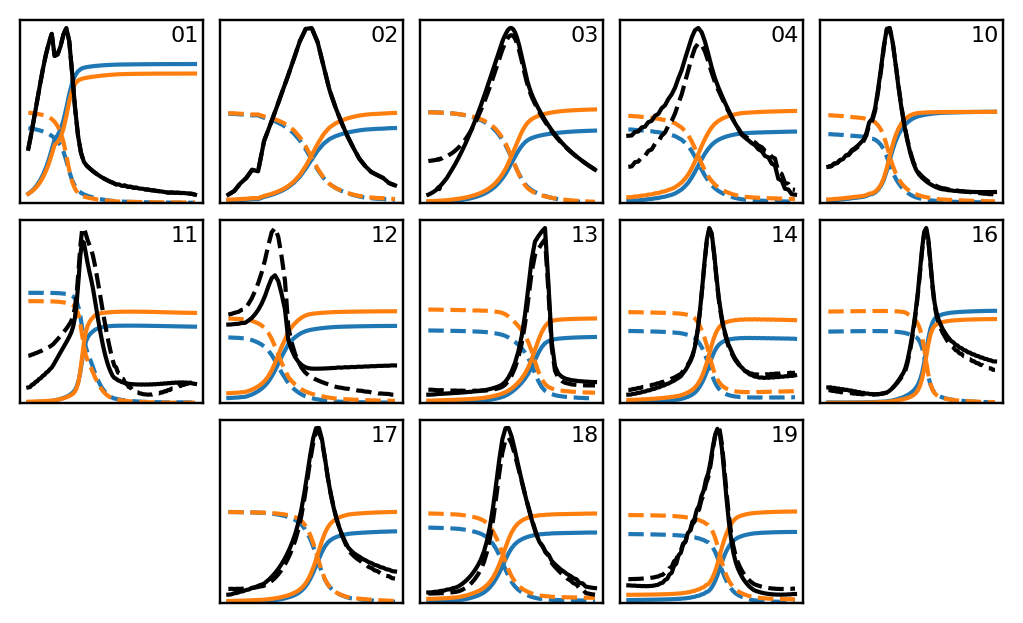

In [9]:
files = sorted([x for x in os.listdir("./H2COMBUSTION-BO-POL-IRC/") if ".npz" in x])
nrows, ncols = 3, 5
idx = 0
jdx = 0

fig, ax = plt.subplots(nrows, ncols, dpi=200, figsize=(ncols, nrows), sharey=True, layout='constrained')

for file in files:
    if "12a" in file:
        continue
    for s in [5, 6, 7, 8, 9, 15]:
        if f'{s:02}' in file:
            break
    else:
        fname = file.split("_")[0].strip("ab")
        data = dict(np.load(f"./H2COMBUSTION-BO-POL-IRC/{file}"))
        R = data["R"]
        V = R[::, None, ::, ::] - R[::, ::, None, ::]
        D = np.sqrt(np.sum(np.square(V), -1))
        Dsq = D * D

        a = data["ALPHA"]
        aiso = (a[::, 0, 0] + a[::, 1, 1] + a[::, 2, 2])/3.0
        WBI = data["WBI"]
        MBI = data["MBI"]

        bb = np.round(WBI[0] - WBI[-1])
        i, j = np.where(bb == -1)
        i, j = i[i < j][0], j[i < j][0]
        k, l = np.where(bb ==  1)
        k, l = k[k < l][0], l[k < l][0]

        dr1 = V[::, i, j] / D[::, i, j].reshape((D.shape[0], 1))
        dr2 = V[::, k, l] / D[::, k, l].reshape((D.shape[0], 1))

        ar1 = (a @ dr1[::, ::, None]).squeeze(-1)
        ar2 = (a @ dr2[::, ::, None]).squeeze(-1)

        arp1 = np.sqrt(np.sum(ar1 * dr1, -1))
        arp2 = np.sqrt(np.sum(ar2 * dr2, -1))

        w1, = ax[idx, jdx].plot(WBI[:, i, j], linestyle='solid', color='tab:blue', label="Wiberg (i-j)")
        w2, = ax[idx, jdx].plot(WBI[:, k, l], linestyle='dashed', color='tab:blue', label="Wiberg (i-k)")
        m1, = ax[idx, jdx].plot(MBI[:, i, j], linestyle='solid', color='tab:orange', label="Mayer (i-j)")
        m2, = ax[idx, jdx].plot(MBI[:, k, l], linestyle='dashed', color='tab:orange', label="Mayer (i-k)")
        ax[idx, jdx].set_ylim(0.0, 2.0)
        ax[idx, jdx].text(0.82, 0.88, fname, fontsize=8, transform=ax[idx, jdx].transAxes)

        ax[idx, jdx].set_yticks([])
        ax[idx, jdx].set_xticks([])

        ay = ax[idx, jdx].twinx()
        a1, = ay.plot(arp1, label=r'$\alpha_{ij}$', linestyle='solid', color='black')
        a2, = ay.plot(arp2, label=r'$\alpha_{ik}$', linestyle='dashed', color='black')
        ay.set_yticks([])

        jdx += 1
        if jdx >= ncols:
            jdx = 0
            idx += 1
            if idx == 2:
                jdx = 1

fig.delaxes(ax[2, 0])
fig.delaxes(ax[2, 4])


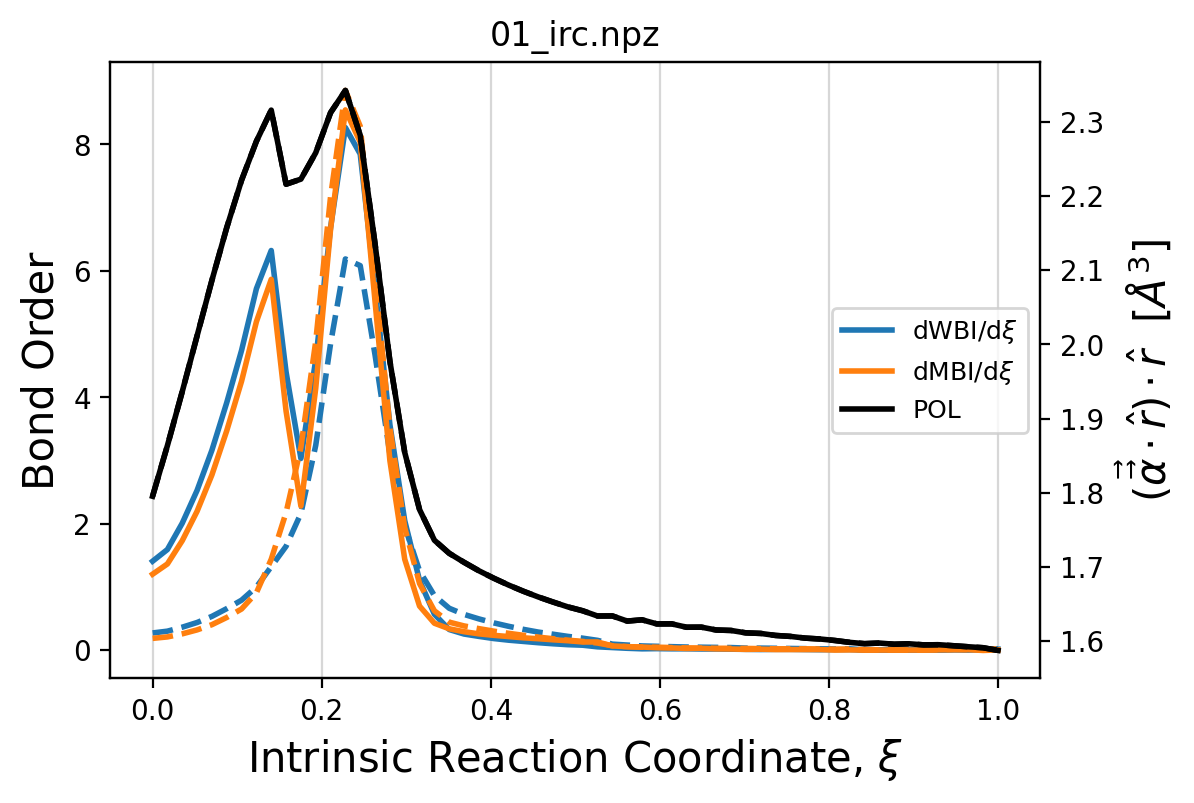

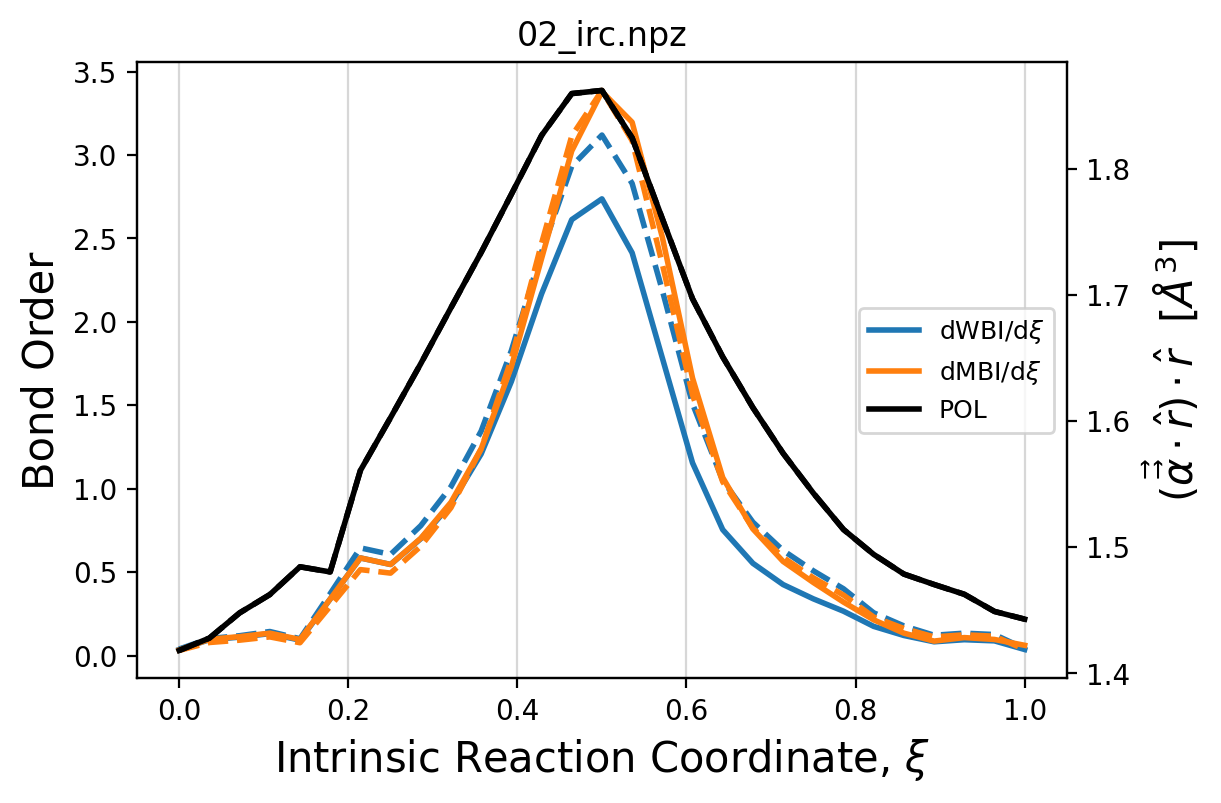

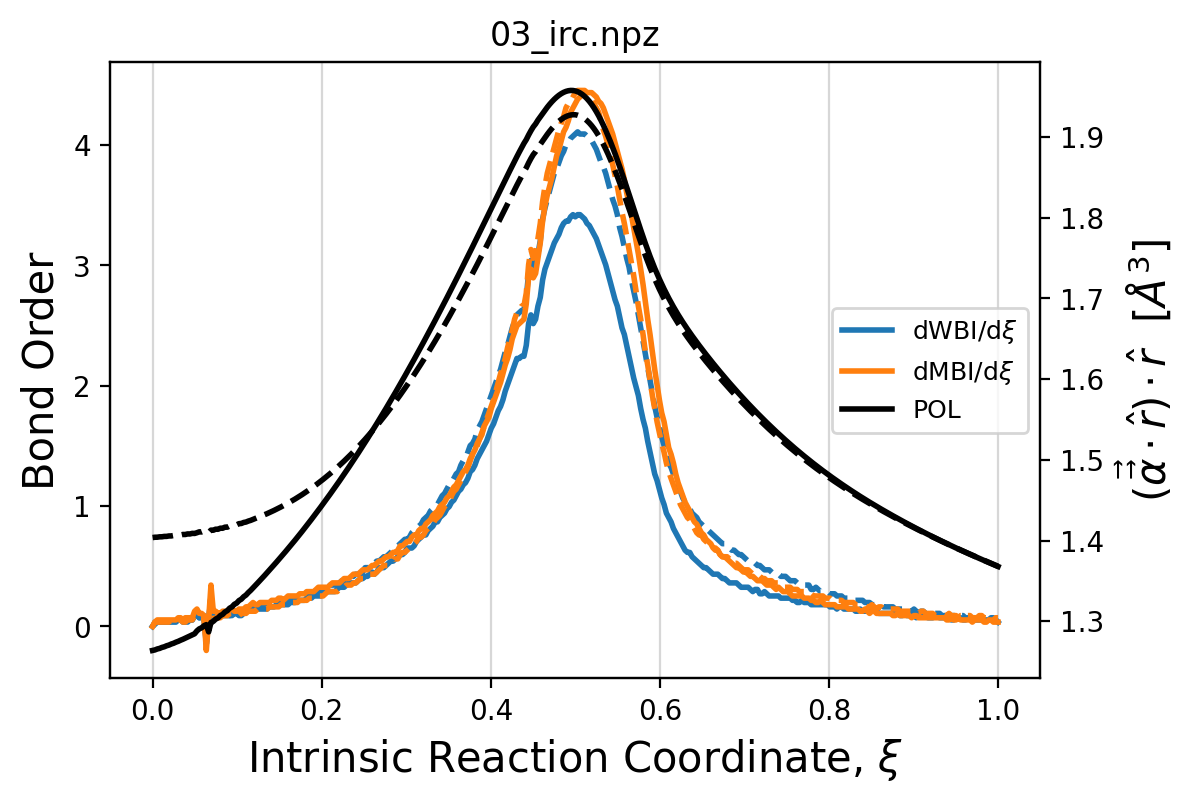

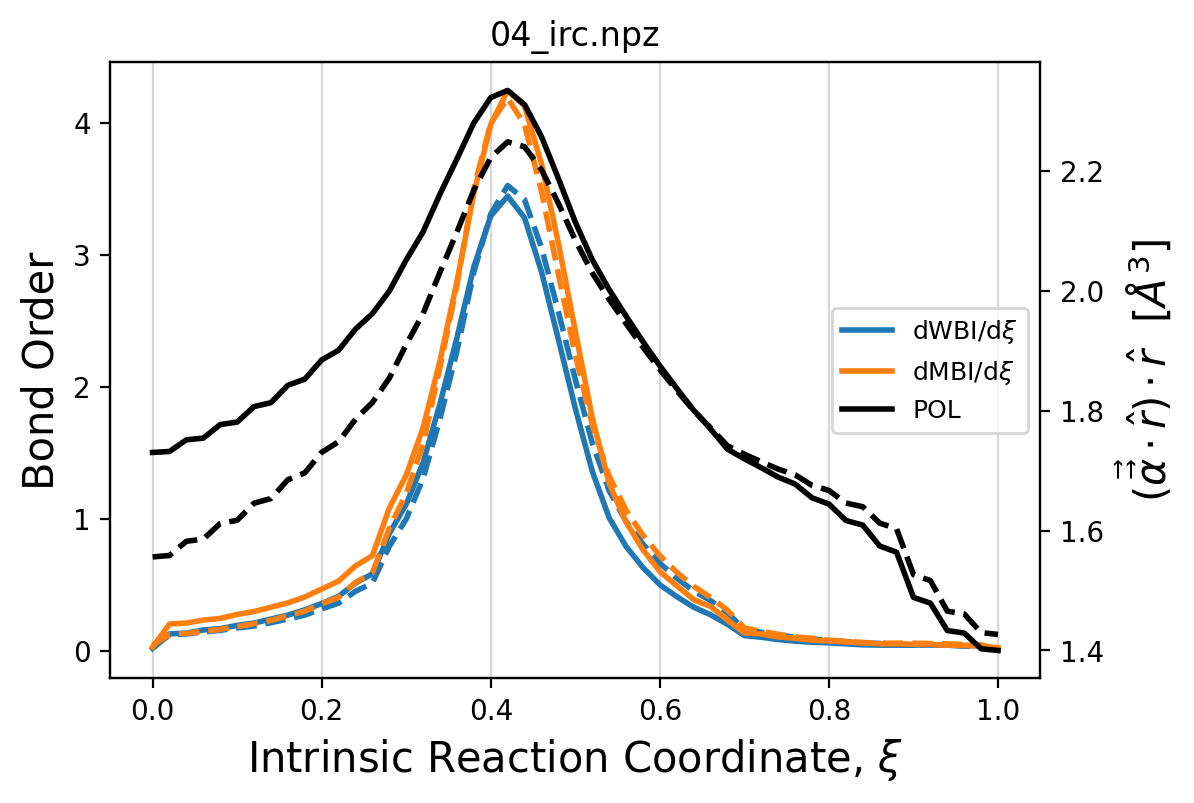

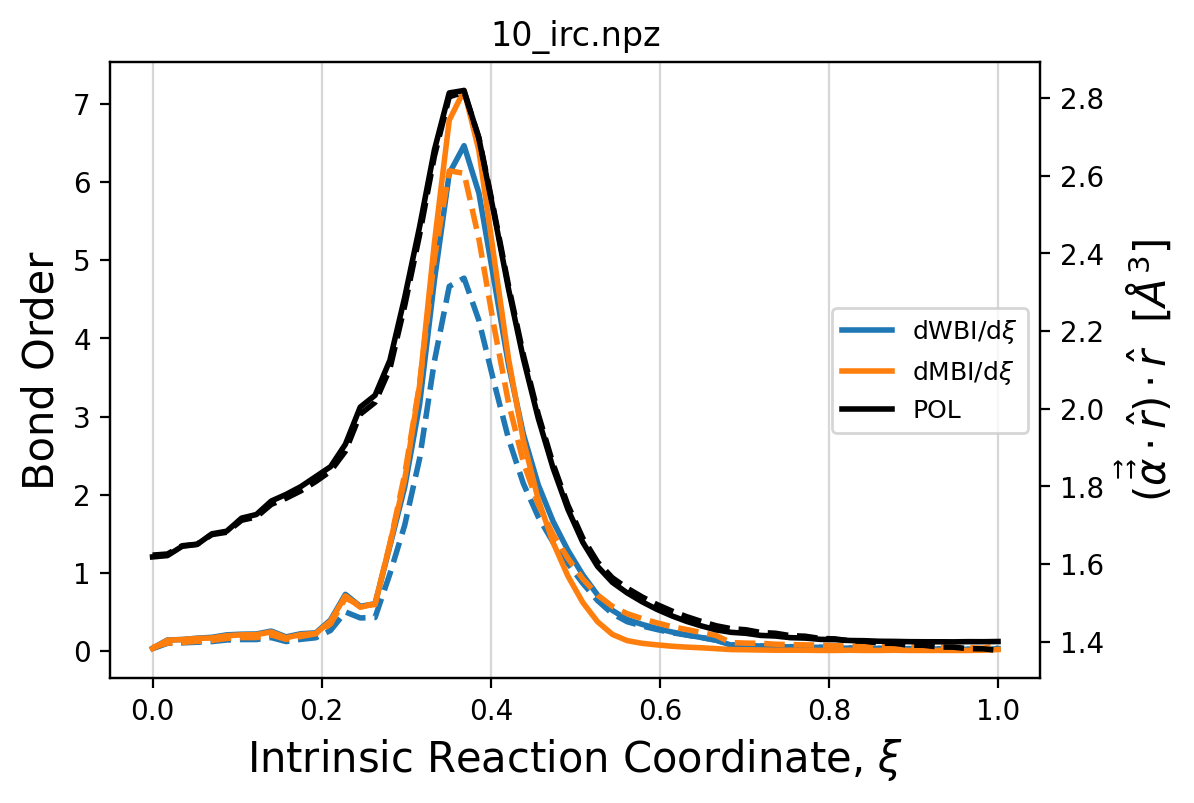

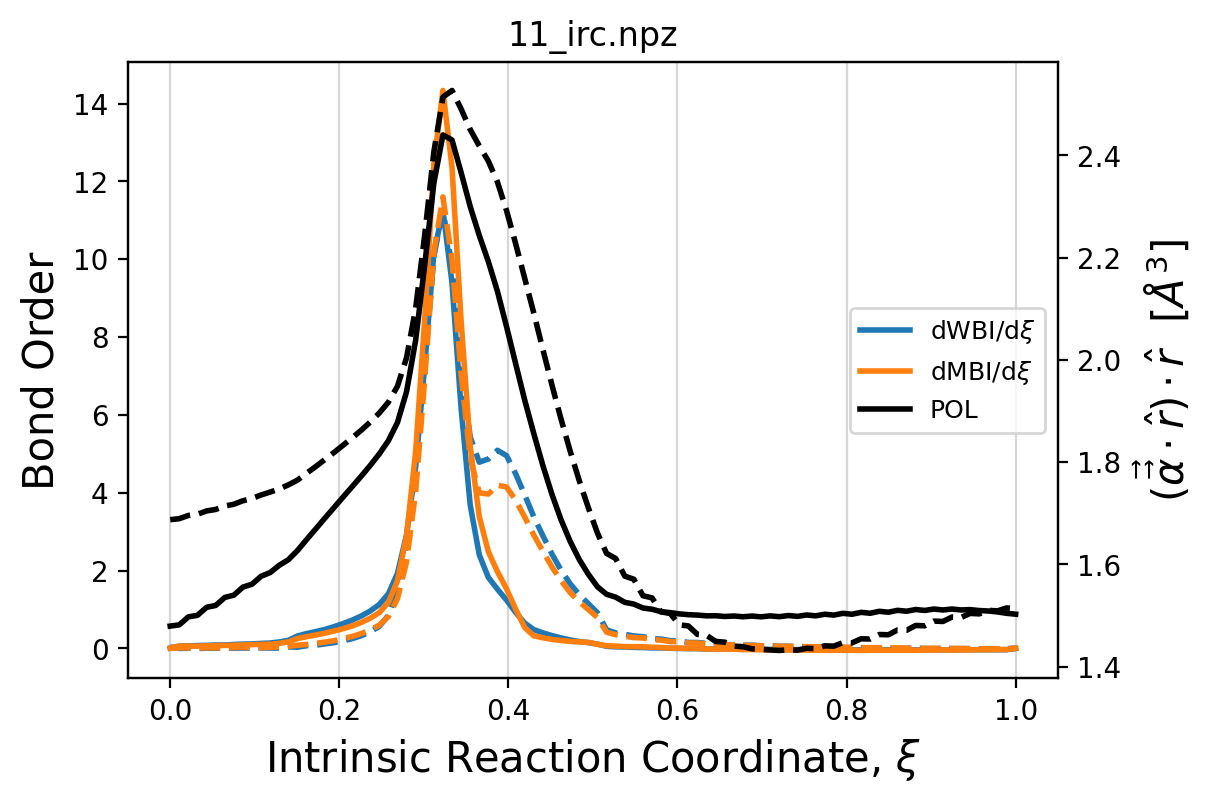

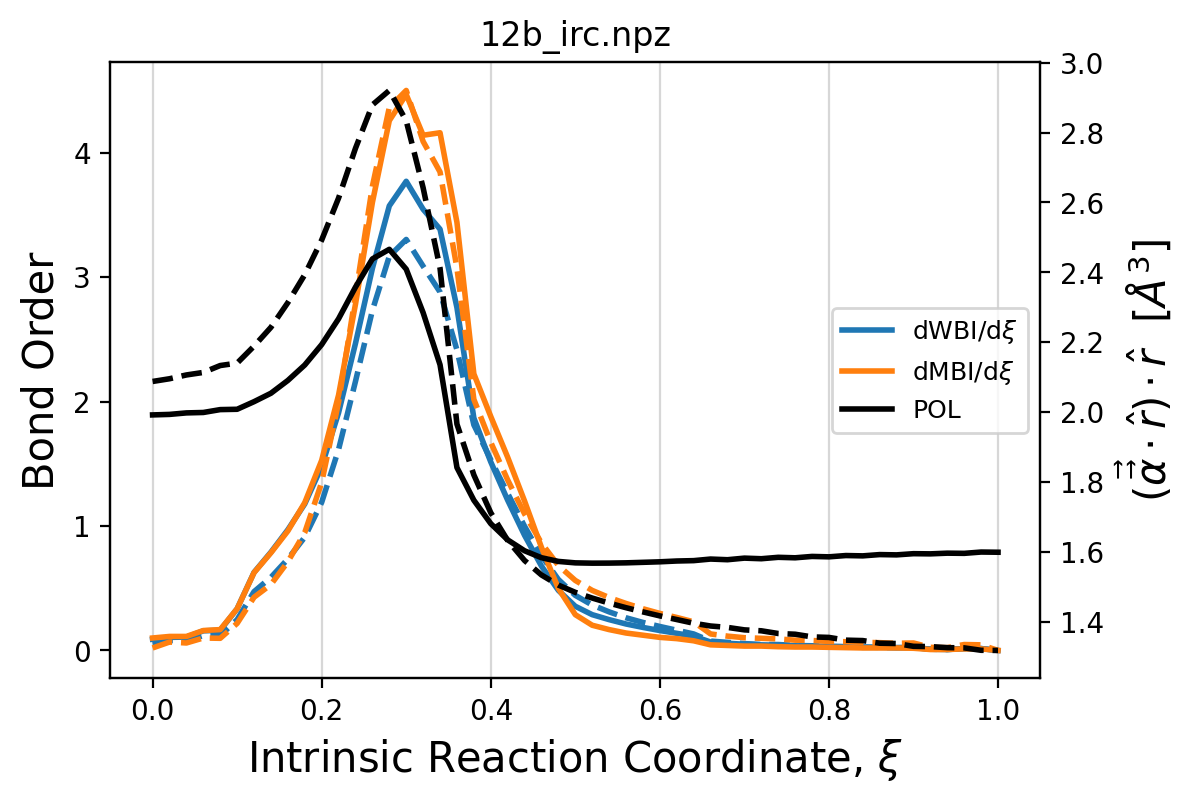

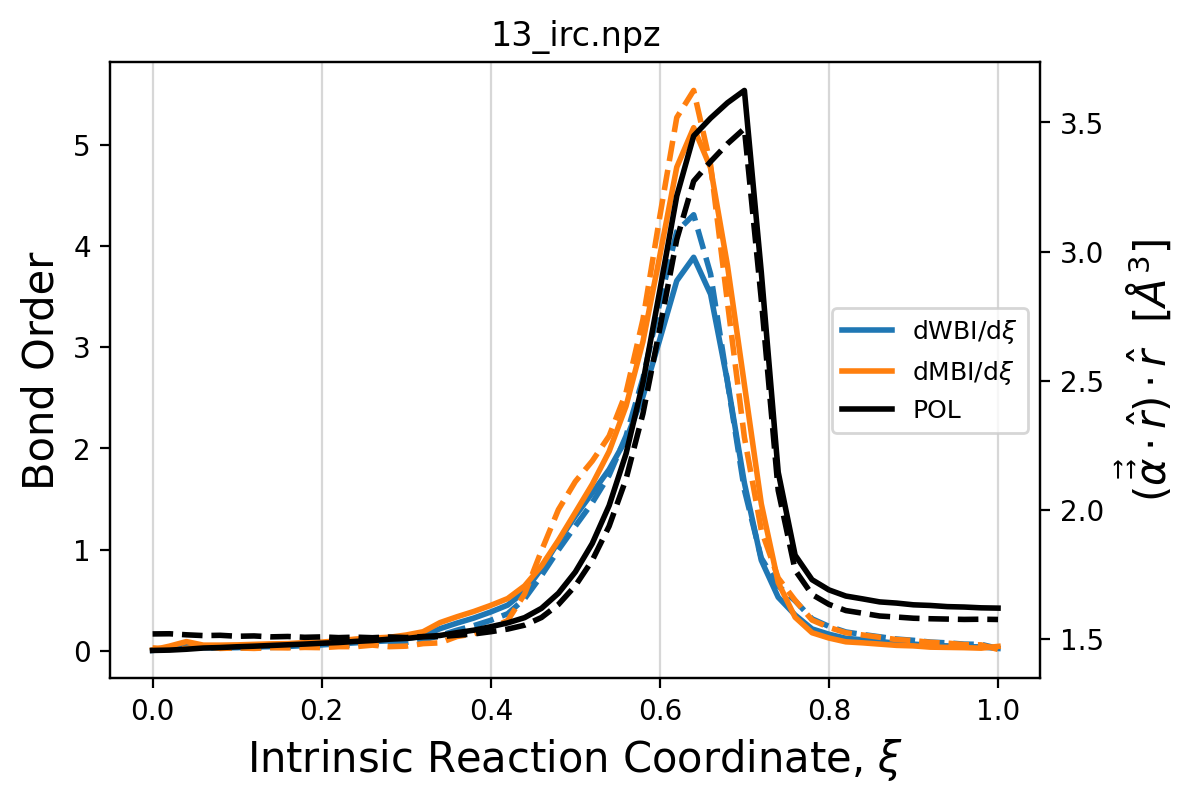

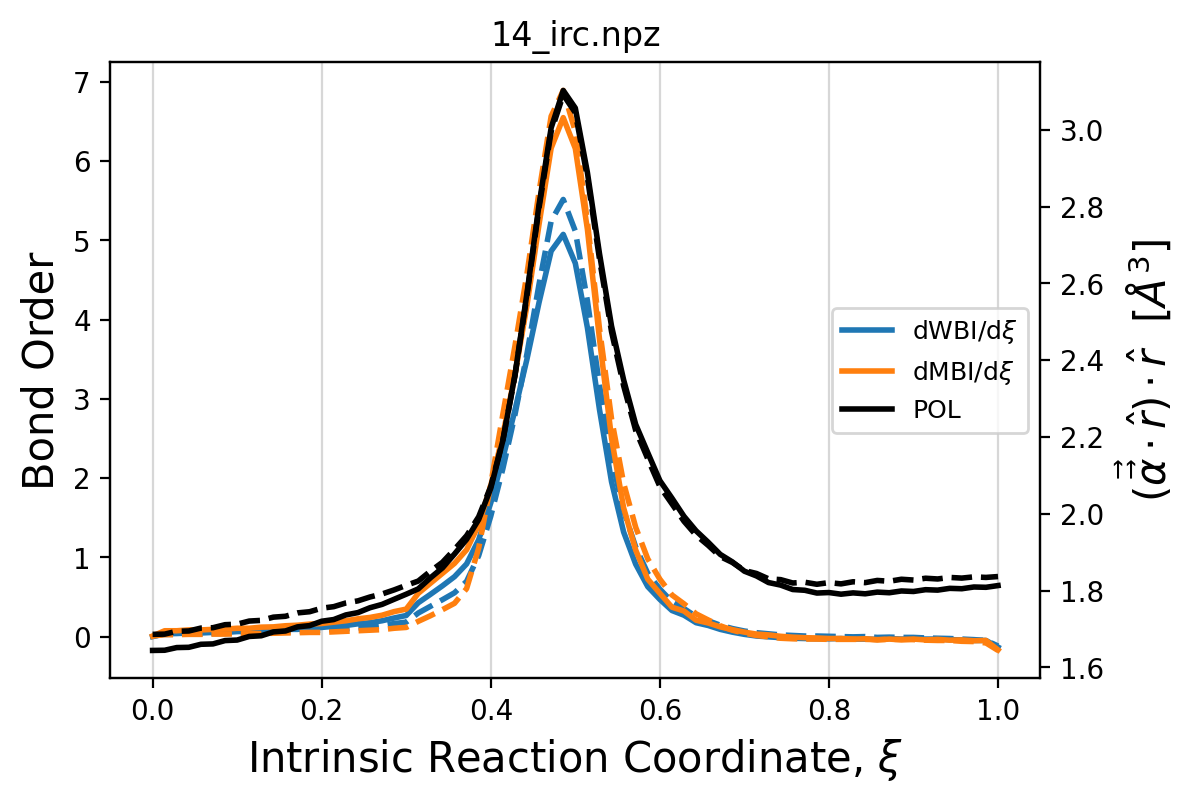

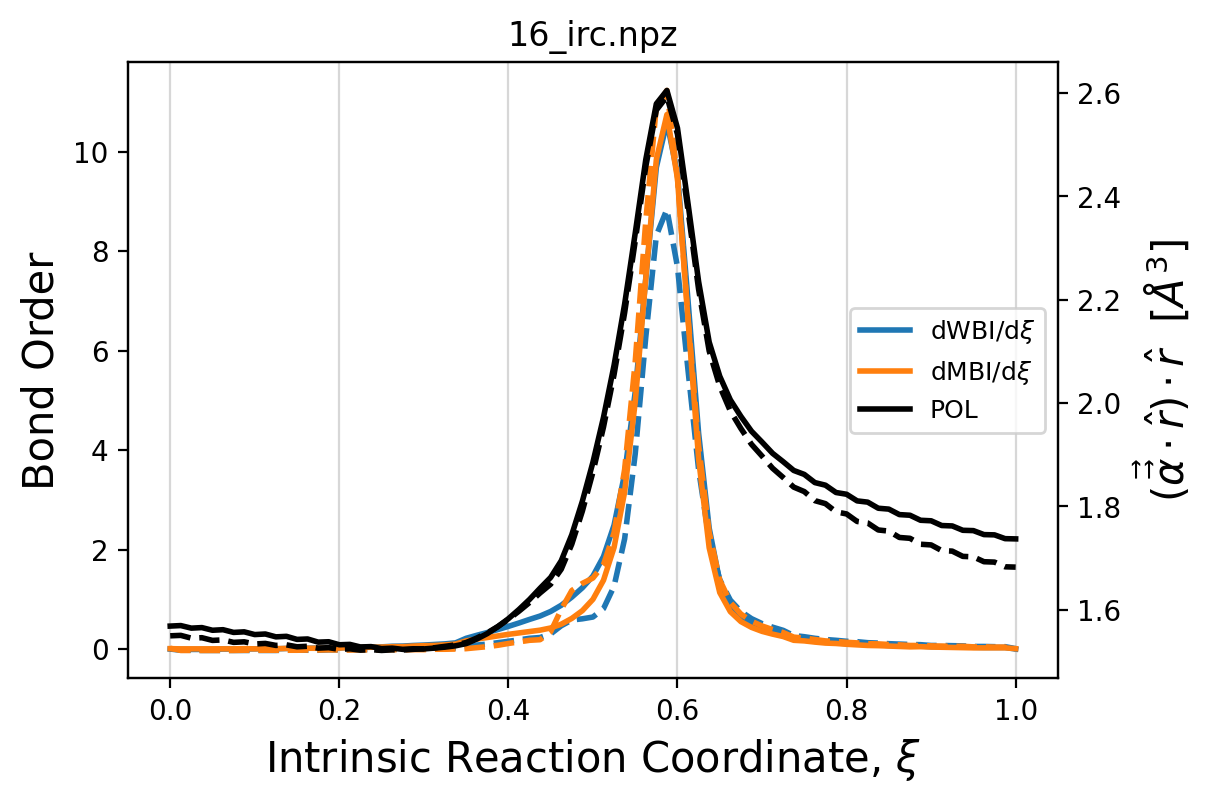

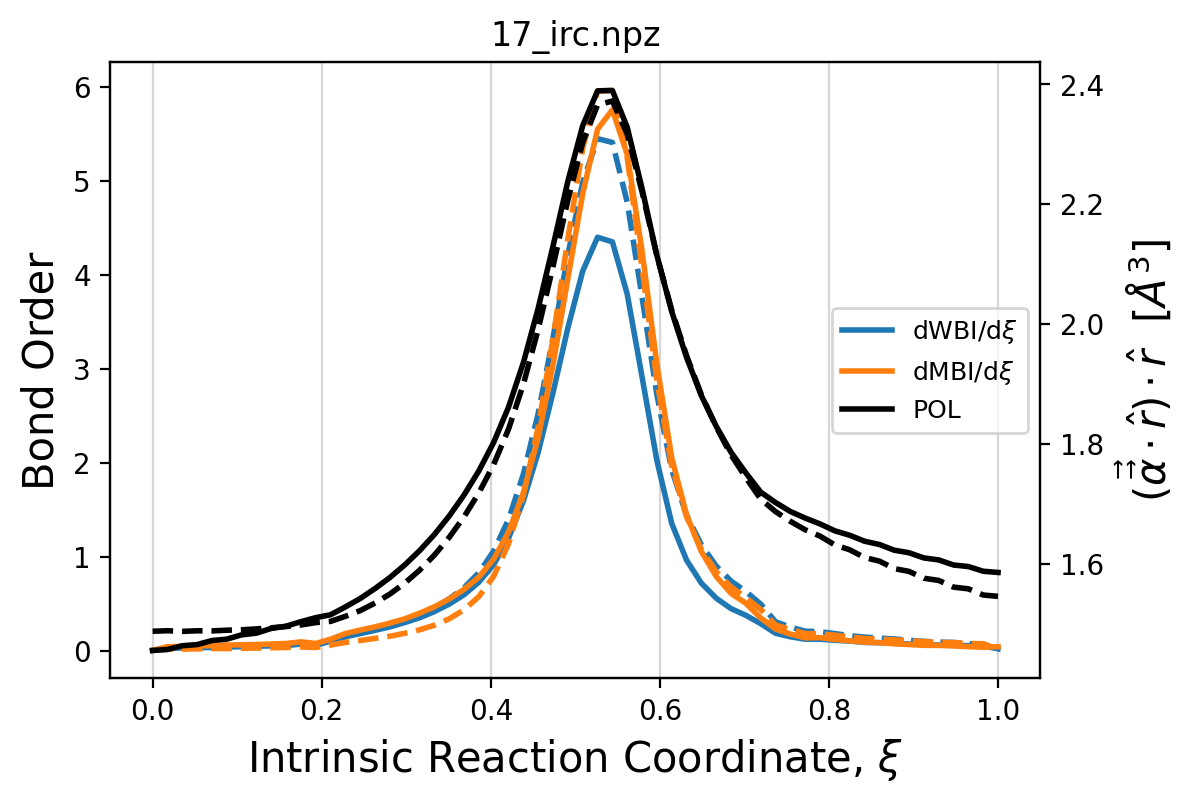

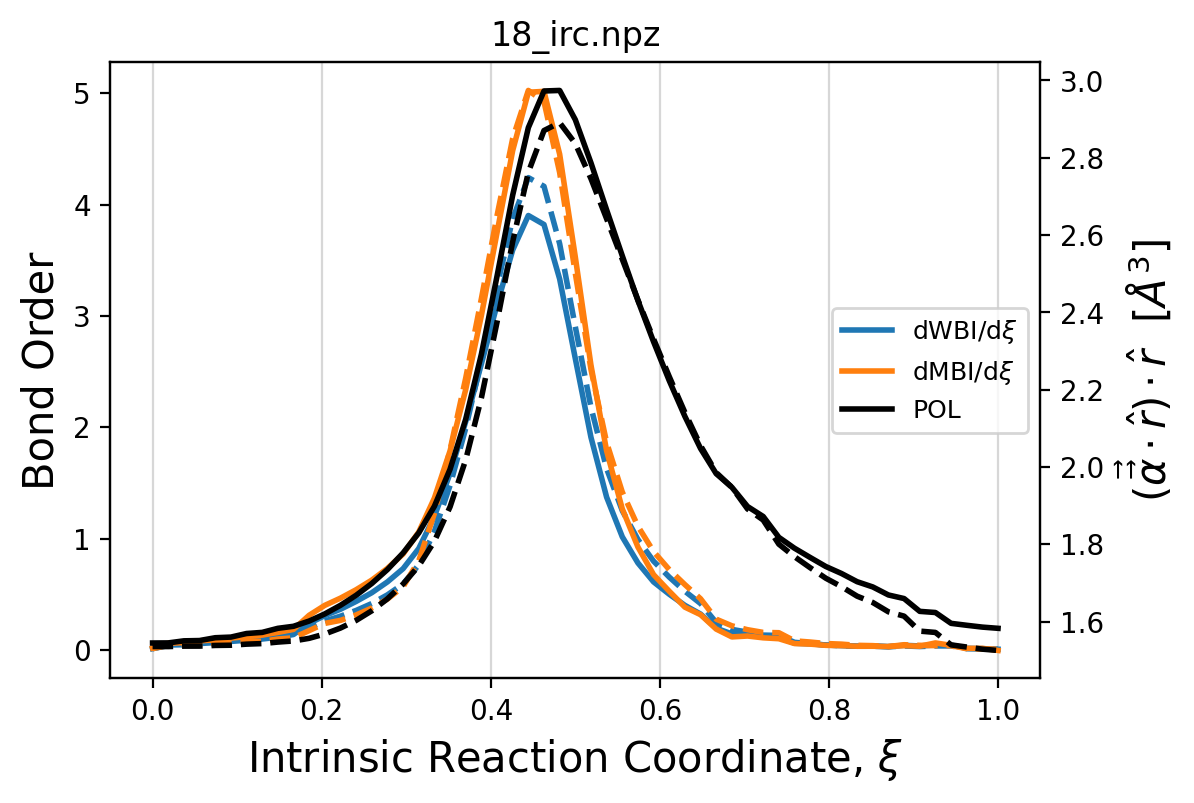

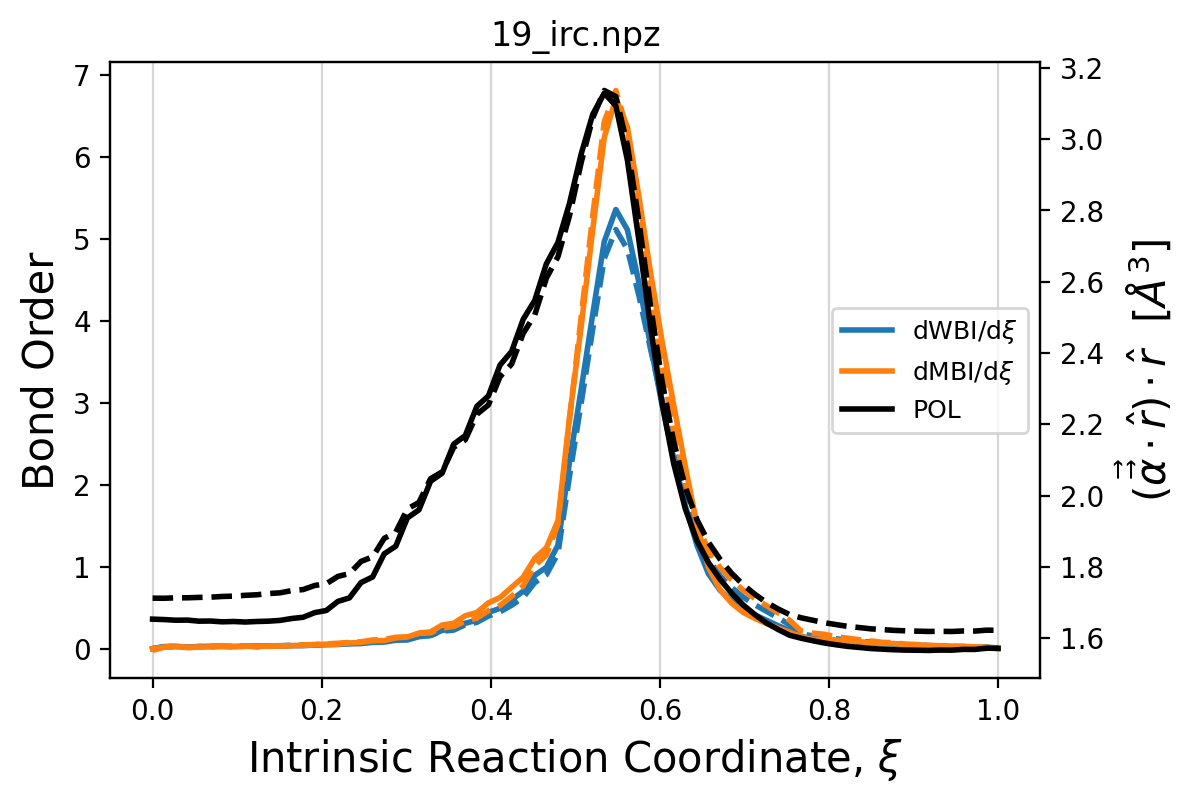

In [12]:
files = sorted([x for x in os.listdir("./H2COMBUSTION-BO-POL-IRC/") if ".npz" in x])

for file in files:
    if "12a" in file:
        continue
    for s in [5, 6, 7, 8, 9, 15]:
        if f'{s:02}' in file:
            break
    else:
        data = dict(np.load(f"./H2COMBUSTION-BO-POL-IRC/{file}"))
        R = data["R"]
        V = R[::, None, ::, ::] - R[::, ::, None, ::]
        D = np.sqrt(np.sum(np.square(V), -1))

        a = data["ALPHA"]
        aiso = (a[::, 0, 0] + a[::, 1, 1] + a[::, 2, 2])/3.0
        WBI = data["WBI"]
        MBI = data["MBI"]

        bb = np.round(WBI[0] - WBI[-1])
        i, j = np.where(bb == -1)
        i, j = i[i < j][0], j[i < j][0]
        k, l = np.where(bb ==  1)
        k, l = k[k < l][0], l[k < l][0]

        dr1 = V[::, i, j] / D[::, i, j].reshape((D.shape[0], 1))
        dr2 = V[::, k, l] / D[::, k, l].reshape((D.shape[0], 1))
        ar1 = (a @ dr1[::, ::, None]).squeeze(-1)
        ar2 = (a @ dr2[::, ::, None]).squeeze(-1)
        arp1 = np.sqrt(np.sum(ar1 * dr1, -1))
        arp2 = np.sqrt(np.sum(ar2 * dr2, -1))

        xaxis = np.linspace(0, 1, len(arp1))
        
        fig, ax = plt.subplots(dpi=200, figsize=(6,4))

        w1, = ax.plot(xaxis, np.gradient(WBI[::, i, j], xaxis), linewidth=2, linestyle='solid', color='tab:blue', label="Wiberg (i-j)")
        w2, = ax.plot(xaxis, -np.gradient(WBI[::, k, l], xaxis), linewidth=2, linestyle='dashed', color='tab:blue', label="Wiberg (i-k)")
        m1, = ax.plot(xaxis, np.gradient(MBI[::, i, j], xaxis), linewidth=2, linestyle='solid', color='tab:orange', label="Mayer (i-j)")
        m2, = ax.plot(xaxis, -np.gradient(MBI[::, k, l], xaxis), linewidth=2, linestyle='dashed', color='tab:orange', label="Mayer (i-k)")

        ax.set_ylabel(r"Bond Order", fontsize=15)
        ax.set_xlabel(r"Intrinsic Reaction Coordinate, $\xi$", fontsize=15)

        ay = ax.twinx()
        a1, = ay.plot(xaxis, arp1, label=r'$\alpha_{ij}$', linewidth=2, linestyle='solid', color='black')
        a2, = ay.plot(xaxis, arp2, label=r'$\alpha_{jk}$', linewidth=2, linestyle='dashed', color='black')

        ay.set_ylabel(r"$(\vec{\vec{\alpha}} \cdot \hat{r}) \cdot \hat{r}$  $[\AA^3]$", fontsize=15)
        plt.title(file)
        ax.legend([w1, m1, a1, a2], [r"dWBI/d$\xi$", r"dMBI/d$\xi$", "POL"], loc='center right', fontsize=9)
        ax.grid(axis='x', alpha=0.5)
        plt.show()


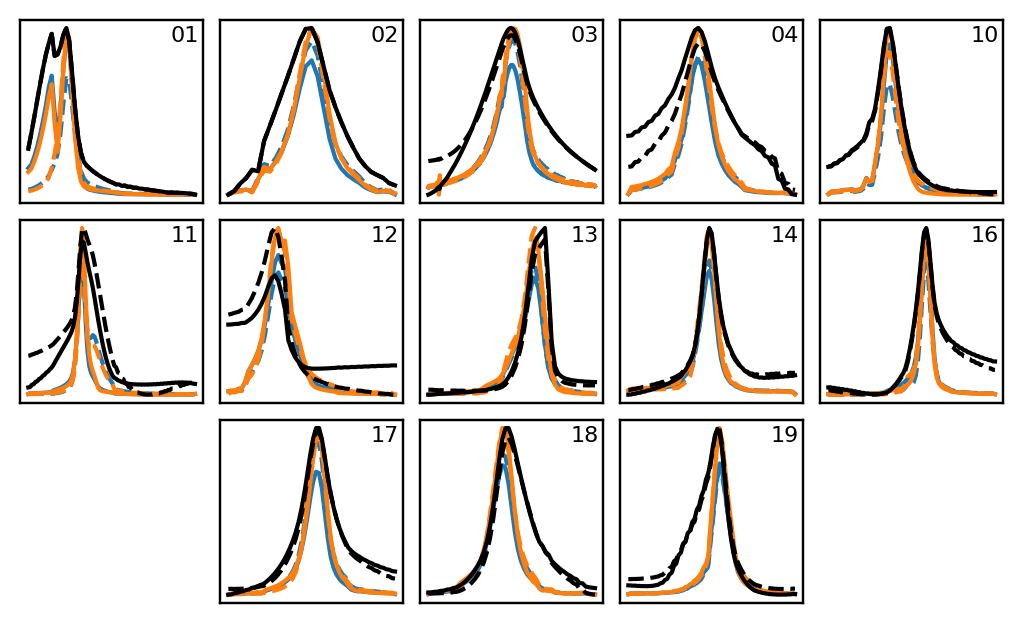

In [15]:
files = sorted([x for x in os.listdir("./H2COMBUSTION-BO-POL-IRC/") if ".npz" in x])
nrows, ncols = 3, 5
idx = 0
jdx = 0

fig, ax = plt.subplots(nrows, ncols, dpi=200, figsize=(ncols, nrows), sharey=False, layout='constrained')

for file in files:
    if "12a" in file:
        continue
    for s in [5, 6, 7, 8, 9, 15]:
        if f'{s:02}' in file:
            break
    else:
        fname = file.split("_")[0].strip("ab")
        data = dict(np.load(f"./H2COMBUSTION-BO-POL-IRC/{file}"))
        R = data["R"]
        V = R[::, None, ::, ::] - R[::, ::, None, ::]
        D = np.sqrt(np.sum(np.square(V), -1))
        Dsq = D * D

        a = data["ALPHA"]
        aiso = (a[::, 0, 0] + a[::, 1, 1] + a[::, 2, 2])/3.0
        WBI = data["WBI"]
        MBI = data["MBI"]

        bb = np.round(WBI[0] - WBI[-1])
        i, j = np.where(bb == -1)
        i, j = i[i < j][0], j[i < j][0]
        k, l = np.where(bb ==  1)
        k, l = k[k < l][0], l[k < l][0]

        dr1 = V[::, i, j] / D[::, i, j].reshape((D.shape[0], 1))
        dr2 = V[::, k, l] / D[::, k, l].reshape((D.shape[0], 1))

        ar1 = (a @ dr1[::, ::, None]).squeeze(-1)
        ar2 = (a @ dr2[::, ::, None]).squeeze(-1)

        arp1 = np.sqrt(np.sum(ar1 * dr1, -1))
        arp2 = np.sqrt(np.sum(ar2 * dr2, -1))

        w1, = ax[idx, jdx].plot(np.gradient(WBI[:, i, j]), linestyle='solid', color='tab:blue', label="Wiberg (i-j)")
        w2, = ax[idx, jdx].plot(-np.gradient(WBI[:, k, l]), linestyle='dashed', color='tab:blue', label="Wiberg (i-k)")
        m1, = ax[idx, jdx].plot(np.gradient(MBI[:, i, j]), linestyle='solid', color='tab:orange', label="Mayer (i-j)")
        m2, = ax[idx, jdx].plot(-np.gradient(MBI[:, k, l]), linestyle='dashed', color='tab:orange', label="Mayer (i-k)")
        ax[idx, jdx].text(0.82, 0.88, fname, fontsize=8, transform=ax[idx, jdx].transAxes)

        ax[idx, jdx].set_yticks([])
        ax[idx, jdx].set_xticks([])

        ay = ax[idx, jdx].twinx()

        a1, = ay.plot(arp1, label=r'$\alpha_{ij}$', linestyle='solid', color='black')
        a2, = ay.plot(arp2, label=r'$\alpha_{ik}$', linestyle='dashed', color='black')
        ay.set_yticks([])

        jdx += 1
        if jdx >= ncols:
            jdx = 0
            idx += 1
            if idx == 2:
                jdx = 1

fig.delaxes(ax[2, 0])
fig.delaxes(ax[2, 4])
